<a href="https://colab.research.google.com/github/valentinogallard0/actividad10_datosmasivos/blob/main/actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Importing acf and pacf functions
from statsmodels.tsa.stattools import acf, pacf
import warnings
warnings.filterwarnings("ignore")

##Leyendo datos

In [ ]:
data = pd.read_csv('sales-of-shampoo.csv')
print(data.head())

        Month  Sales
0  2011-01-01  266.0
1  2011-02-01  145.9
2  2011-03-01  183.1
3  2011-04-01  119.3
4  2011-05-01  180.3


##Convertimos fechas y poniendo indice de fechas

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data = data.set_index('Month')
print(data.head())

            Sales
Month            
2011-01-01  266.0
2011-02-01  145.9
2011-03-01  183.1
2011-04-01  119.3
2011-05-01  180.3


##Describiendo datos

In [ ]:
print(data.describe())

serie_tiempo = data['Sales']
print(serie_tiempo.head())

            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000
Month
2011-01-01    266.0
2011-02-01    145.9
2011-03-01    183.1
2011-04-01    119.3
2011-05-01    180.3
Name: Sales, dtype: float64


##Visualizando la serie de tiempo

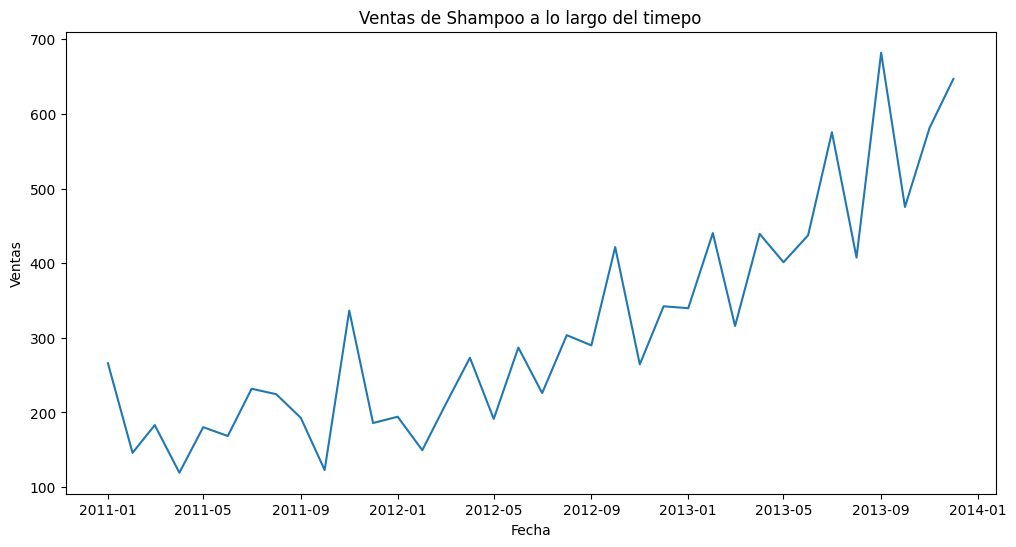

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(serie_tiempo)
plt.title('Ventas de Shampoo a lo largo del timepo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

##Histrograma de datos

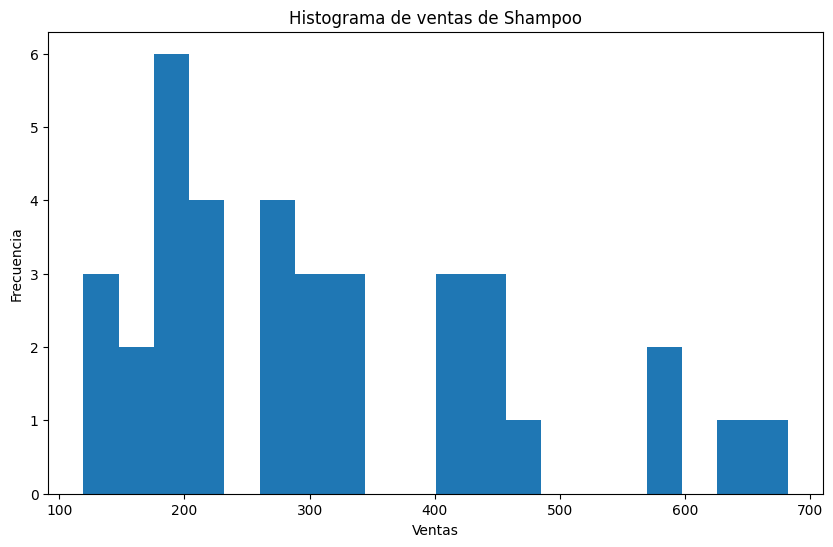

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(serie_tiempo, bins=20)
plt.title('Histograma de ventas de Shampoo')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

##Estimacion de la funcion de disrtibucion de probabilidad

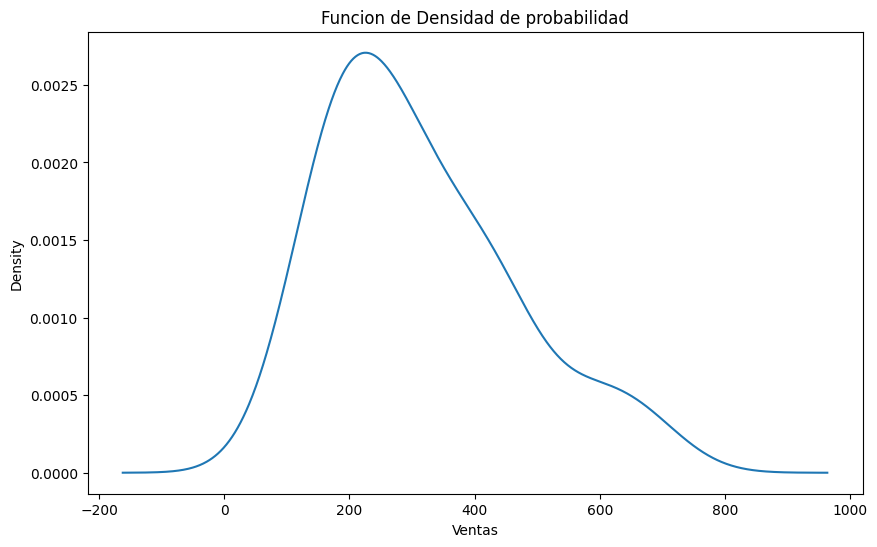

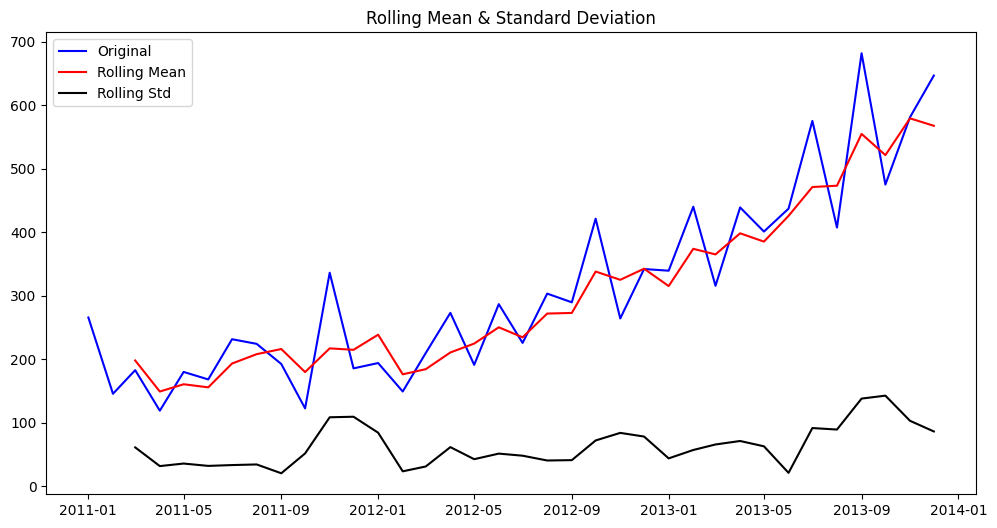

Resultados del Test de Dickey-Fuller:
Estadístico de Prueba              3.060142
Valor p                            1.000000
Lags Usados                       10.000000
Número de Observaciones Usadas    25.000000
Valor Crítico (1%)                -3.723863
Valor Crítico (5%)                -2.986489
Valor Crítico (10%)               -2.632800
dtype: float64


In [ ]:
serie_tiempo.plot(kind='kde', figsize=(10, 6))
plt.title('Funcion de Densidad de probabilidad')
plt.xlabel('Ventas')
plt.show()

def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    # plotting rolling statistics
    plt.figure(figsize=(12, 6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    st = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test:
    print('Resultados del Test de Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estadístico de Prueba', 'Valor p', 'Lags Usados', 'Número de Observaciones Usadas'])
    for key, value in dftest[4].items():
        dfoutput['Valor Crítico (%s)' % key] = value
    print(dfoutput)

# Prueba de estacionariedad
test_stationarity(serie_tiempo)

##Aplicando logaritmo para estabilizar la varianza

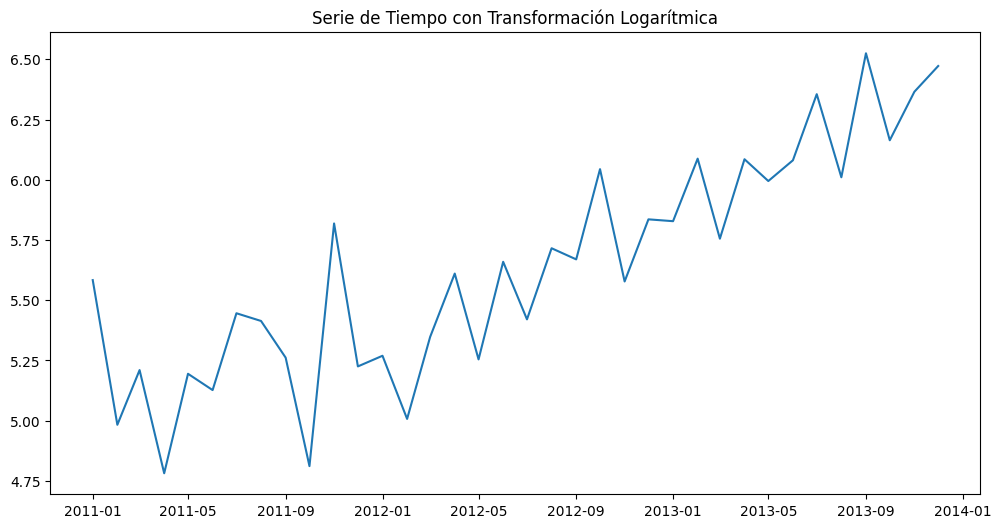

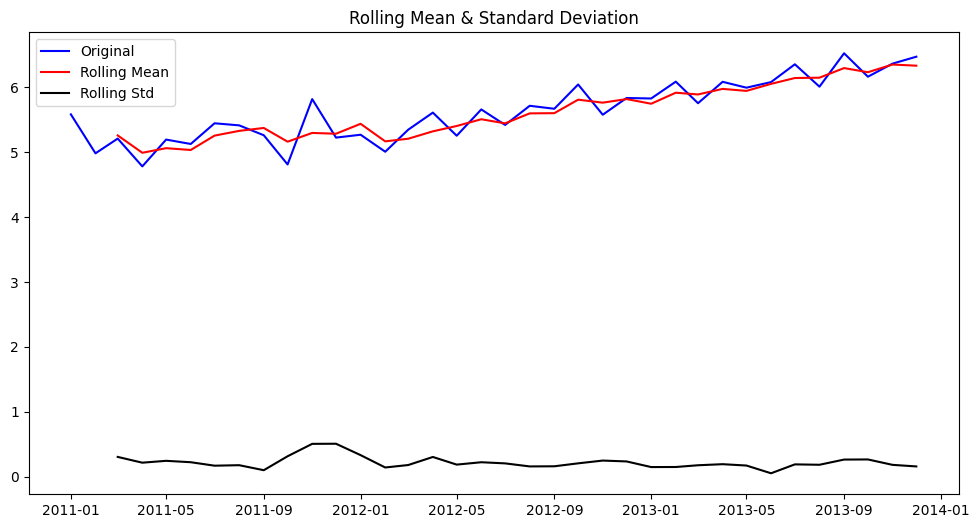

Resultados del Test de Dickey-Fuller:
Estadístico de Prueba              1.798463
Valor p                            0.998346
Lags Usados                       10.000000
Número de Observaciones Usadas    25.000000
Valor Crítico (1%)                -3.723863
Valor Crítico (5%)                -2.986489
Valor Crítico (10%)               -2.632800
dtype: float64


In [ ]:
serie_tiempo_log = np.log(serie_tiempo)
plt.figure(figsize=(12, 6))
plt.plot(serie_tiempo_log)
plt.title('Serie de Tiempo con Transformación Logarítmica')
plt.show()

test_stationarity(serie_tiempo_log)

##Promedios moviles

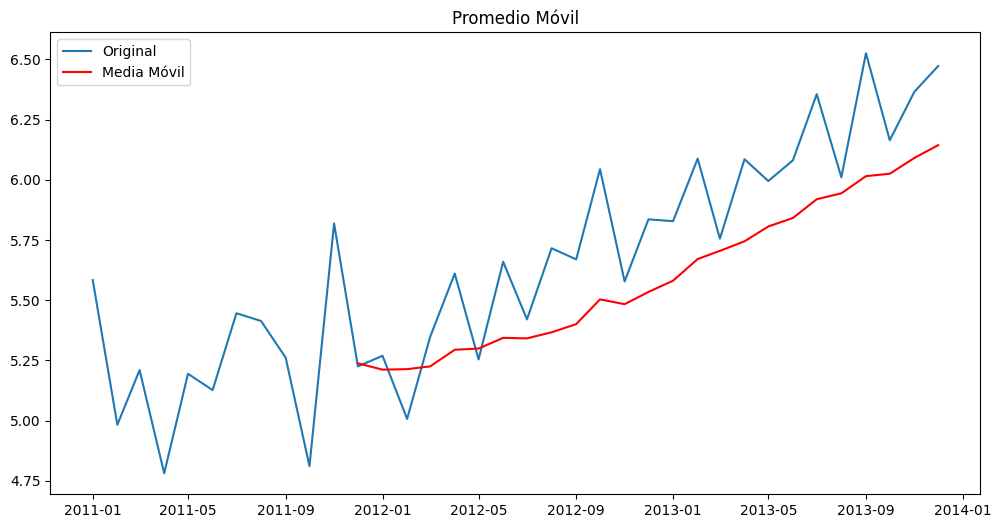

In [ ]:
rolling_mean = serie_tiempo_log.rolling(window=12).mean()
plt.figure(figsize=(12, 6))
plt.plot(serie_tiempo_log, label='Original')
plt.plot(rolling_mean, color='red', label='Media Móvil')
plt.legend(loc='best')
plt.title('Promedio Móvil')
plt.show()

##Eliminando tendencia con diferenciacion

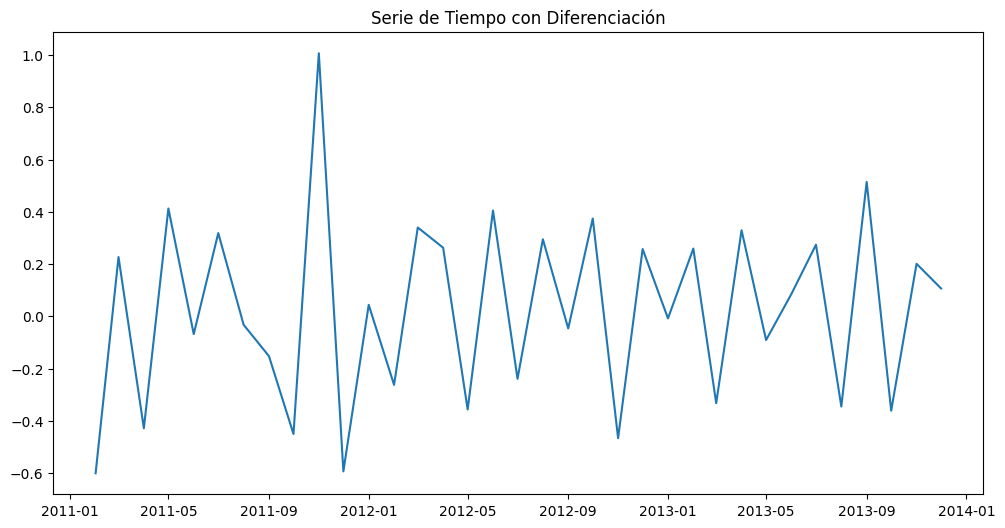

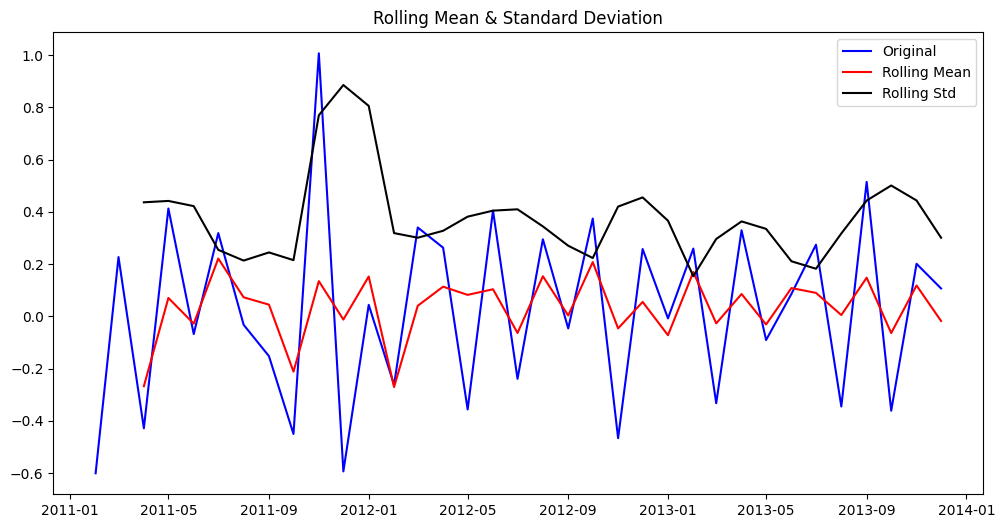

Resultados del Test de Dickey-Fuller:
Estadístico de Prueba             -2.168202
Valor p                            0.217988
Lags Usados                       10.000000
Número de Observaciones Usadas    24.000000
Valor Crítico (1%)                -3.737709
Valor Crítico (5%)                -2.992216
Valor Crítico (10%)               -2.635747
dtype: float64


In [ ]:
serie_tiempo_log_diff = serie_tiempo_log.diff(1)
serie_tiempo_log_diff.dropna(inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(serie_tiempo_log_diff)
plt.title('Serie de Tiempo con Diferenciación')
plt.show()

test_stationarity(serie_tiempo_log_diff)

##Descomposicion de la serie temporal

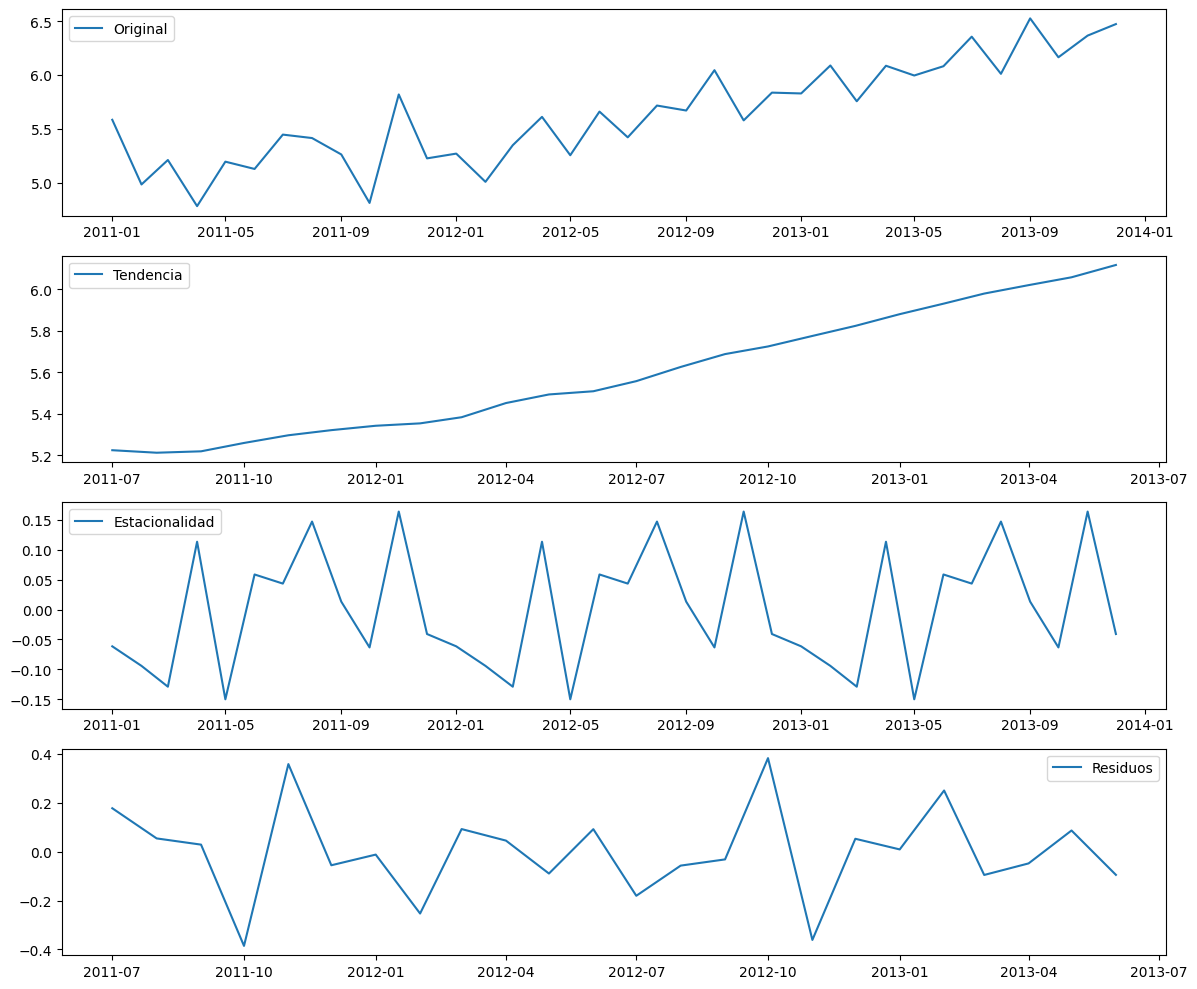

In [ ]:
decomposition = seasonal_decompose(serie_tiempo_log, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(serie_tiempo_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##Graficos ACF y PACF

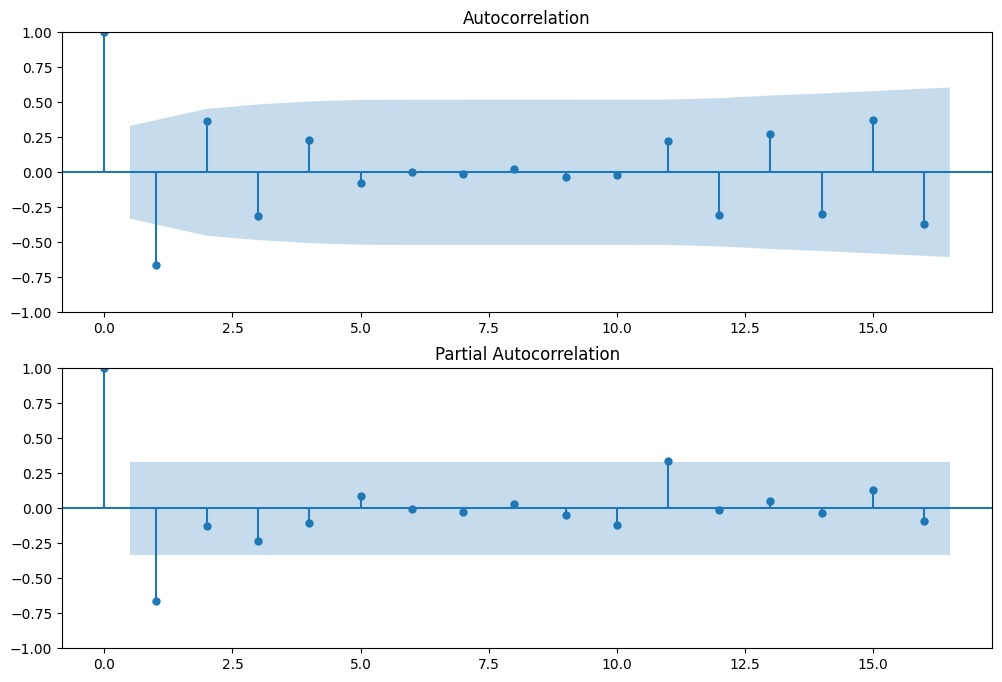

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(serie_tiempo_log_diff, ax=plt.gca(), lags=min(20, len(serie_tiempo_log_diff) // 2 - 1)) # Adjust lags for ACF
plt.subplot(212)
plot_pacf(serie_tiempo_log_diff, ax=plt.gca(), lags=min(20, len(serie_tiempo_log_diff) // 2 - 1)) # Adjust lags for PACF
plt.show()

##Calculando ACF y PACF (método alternativo)


In [ ]:
max_lags = len(serie_tiempo_log_diff) // 2 - 1
lag_acf = acf(serie_tiempo_log_diff, nlags=min(20, max_lags))
lag_pacf = pacf(serie_tiempo_log_diff, nlags=min(20, max_lags), method='ols')

##Graficando ACF y PACF

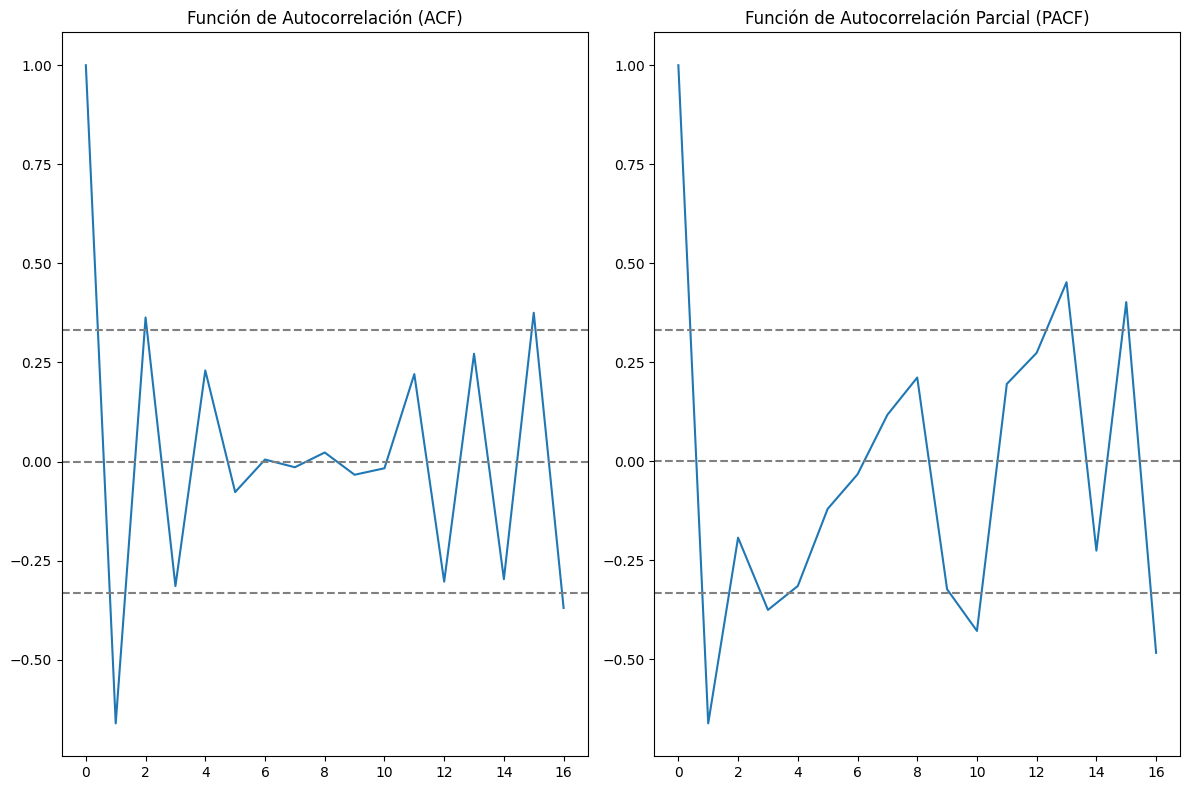

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color='gray')
plt.title('Función de Autocorrelación (ACF)')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color='gray')
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()

##Buscando el mejor modelo ARIMA

In [ ]:
maxp = 3
maxd = 2
maxq = 3
aic_results = []

for p in range(maxp + 1):
    for d in range(maxd + 1):
        for q in range(maxq + 1):
            try:
                model = sm.tsa.ARIMA(serie_tiempo_log, order=(p, d, q))
                model_fit = model.fit()
                aic_results.append((p, d, q, model_fit.aic))
                print(f'ARIMA({p},{d},{q}): AIC={model_fit.aic}')
            except:
                continue

ARIMA(0,0,0): AIC=50.48374035923973
ARIMA(0,0,1): AIC=42.86003113366043
ARIMA(0,0,2): AIC=31.405539339620297
ARIMA(0,0,3): AIC=32.400053163476684
ARIMA(0,1,0): AIC=29.74119779778236
ARIMA(0,1,1): AIC=13.968234522983918
ARIMA(0,1,2): AIC=10.819785988358458
ARIMA(0,1,3): AIC=12.250739663428174
ARIMA(0,2,0): AIC=69.65649883107112
ARIMA(0,2,1): AIC=35.31978810113419
ARIMA(0,2,2): AIC=12.597567696343951
ARIMA(0,2,3): AIC=17.988309095341037
ARIMA(1,0,0): AIC=29.719201016476326
ARIMA(1,0,1): AIC=19.15091920333925
ARIMA(1,0,2): AIC=16.109645980562522
ARIMA(1,0,3): AIC=16.91497253321099
ARIMA(1,1,0): AIC=10.874357105014331
ARIMA(1,1,1): AIC=11.13957809677107
ARIMA(1,1,2): AIC=12.641734800910854
ARIMA(1,1,3): AIC=14.299696868187823
ARIMA(1,2,0): AIC=35.66774720355893
ARIMA(1,2,1): AIC=16.856574225295294
ARIMA(1,2,2): AIC=11.785296256106205
ARIMA(1,2,3): AIC=12.371084609650106
ARIMA(2,0,0): AIC=15.505886050944488
ARIMA(2,0,1): AIC=16.358015884536567
ARIMA(2,0,2): AIC=17.898952537758966
ARIMA(2,0,

##Ordenar por AIC (menor es mejor)

In [ ]:
aic_results.sort(key=lambda x: x[3])
print("\nMejores modelos según AIC:")
for i in range(min(5, len(aic_results))):
    print(f"ARIMA{aic_results[i][0:3]}: AIC={aic_results[i][3]}")


Mejores modelos según AIC:
ARIMA(3, 1, 2): AIC=8.103643587510556
ARIMA(2, 1, 3): AIC=9.827122583630059
ARIMA(3, 1, 3): AIC=9.907430378345662
ARIMA(3, 2, 3): AIC=10.045896285562351
ARIMA(0, 1, 2): AIC=10.819785988358458


##Seleccionar el mejor modelo

In [ ]:
best_p, best_d, best_q, best_aic = aic_results[0]
print(f"\nMejor modelo: ARIMA({best_p}, {best_d}, {best_q}) con AIC={best_aic}")


Mejor modelo: ARIMA(3, 1, 2) con AIC=8.103643587510556


##Ajustar el mejor modelo

In [ ]:
best_model = sm.tsa.ARIMA(serie_tiempo_log, order=(best_p, best_d, best_q))
best_model_fit = best_model.fit()
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(3, 1, 2)   Log Likelihood                   1.948
Date:                Sat, 26 Apr 2025   AIC                              8.104
Time:                        02:44:37   BIC                             17.436
Sample:                    01-01-2011   HQIC                            11.325
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1627      0.174     -0.937      0.349      -0.503       0.178
ar.L2         -0.4621      0.176     -2.626      0.009      -0.807      -0.117
ar.L3         -0.6357      0.164     -3.868      0.0

##Hacer predicciones

In [ ]:
forecast_steps = 12  # Predecir 12 meses hacia adelante
forecast = best_model_fit.forecast(steps=forecast_steps)
forecast_series = pd.Series(forecast[0], index=pd.date_range(start=serie_tiempo_log.index[-1], periods=forecast_steps+1, freq='MS')[1:])

##Convertir prediccioens logaritmicas a valores originales

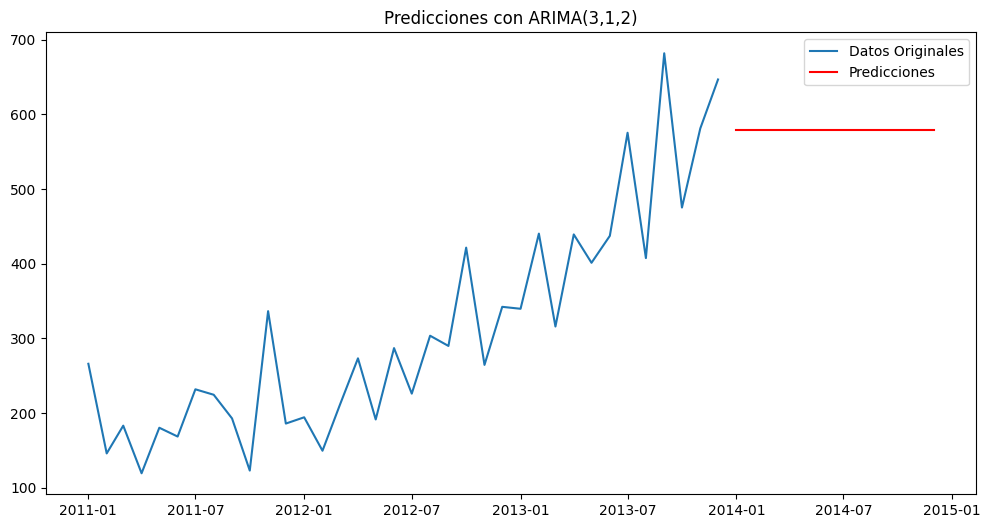

In [ ]:
forecast_values = np.exp(forecast_series)

# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(serie_tiempo, label='Datos Originales')
plt.plot(forecast_values, color='red', label='Predicciones')
plt.title(f'Predicciones con ARIMA({best_p},{best_d},{best_q})')
plt.legend(loc='best')
plt.show()


##Evaluar el modelo

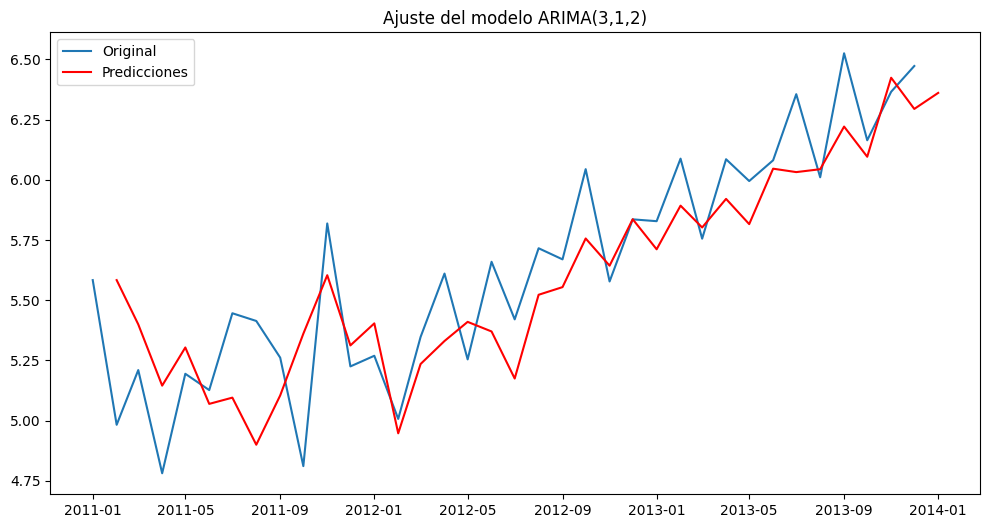

In [ ]:
predicted = best_model_fit.predict(start=1, end=len(serie_tiempo_log))
plt.figure(figsize=(12, 6))
plt.plot(serie_tiempo_log, label='Original')
plt.plot(predicted, color='red', label='Predicciones')
plt.title(f'Ajuste del modelo ARIMA({best_p},{best_d},{best_q})')
plt.legend(loc='best')
plt.show()

##Convertir predicciones logaritmicas a valores originales

In [ ]:
predicted_series = pd.Series(np.exp(predicted), index=serie_tiempo.index)

# Before calculating RMSE and MAE, handle NaN values
# Option 1: Remove rows with NaN values
serie_tiempo = serie_tiempo.dropna()  # Drop NaNs from original series
predicted_series = predicted_series.dropna()  # Drop NaNs from predicted series
# Option 2: Fill NaN values with a specific value (e.g., 0)
# serie_tiempo.fillna(0, inplace=True)
# predicted_series.fillna(0, inplace=True)

# Make sure both series have the same index for comparison
common_index = serie_tiempo.index.intersection(predicted_series.index)
serie_tiempo = serie_tiempo[common_index]
predicted_series = predicted_series[common_index]

##Calcular metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(serie_tiempo, predicted_series))
mae = mean_absolute_error(serie_tiempo, predicted_series)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 68.17329197799805
MAE: 53.964916903442926
